Install

In [1]:
#test
#(studiolab) studio-lab-user@default:~/sagemaker-studiolab-notebooks/AI-OT24$ tensorboard --logdir logs/
#!pip install -q ib_insync numpy pandas yfinance matplotlib ta seaborn gymnasium stable-baselines3 sb3-contrib tensorflow scikit-learn quantstats imitation fredapi typing


Install requirements and import all functions

In [2]:
import os
os.chdir("/home/studio-lab-user/sagemaker-studiolab-notebooks/AI-OT24/Reinforcement-Learning-Stock-Porfolio-Managment")
!pip install -q -r requirements.txt

In [3]:
import sys
sys.path.append('./utils')
import trading_functions  # Import your library
import inspect  # Used to inspect the module

# Get all functions from the library
all_functions = [func for func, obj in inspect.getmembers(trading_functions) if inspect.isfunction(obj)]

# Print the function names
print("Functions in the 'trading_functions' library:")
for function in all_functions:
    print(function)

2024-11-27 18:06:54.889835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Functions in the 'trading_functions' library:
HER
accuracy_score
bin_reward_func
calculate_accuracy
check_env
clear_output
collect_expert_data
create_env
create_env_unique
create_evaluation_env
create_training_env
evaluate_all
evaluate_best
evaluate_buy
evaluate_model
evaluate_policy
evaluate_various
is_significant_reward_improvement
linear_schedule
lnr_reward_func
make_vec_env
save_model
smp_reward_func
sqh_reward_func
sqs_reward_func
stp_reward_func
train_model
train_test_split


In [4]:
import sys
sys.path.append('./utils')
from trading_functions import *
#from trading_functions import linear_schedule, TradingEnvUnique, TradingEnvUniqueMultiple, create_env, create_env_unique, evaluate_best, evaluate_buy, evaluate_model, evaluate_various, evaluate_all

Import

In [5]:
# Core Libraries
import os
import sys
import time
import datetime
import warnings
#warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = info, 2 = warnings, 3 = errors

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Financial Data
import yfinance as yf
import quantstats as qs
import ta

# Machine Learning - Supervised Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Machine Learning - Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy

# Reinforcement Learning and Environments
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import (
    EvalCallback, StopTrainingOnRewardThreshold, StopTrainingOnNoModelImprovement
)
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecCheckNan
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import ARS, MaskablePPO, RecurrentPPO, QRDQN, TRPO

# Imitation Learning
from imitation.algorithms import bc
from imitation.testing.reward_improvement import is_significant_reward_improvement
from imitation.data.types import Transitions

# Interactive Brokers API
from ib_insync import *

from typing import Callable

from collections import Counter

clear_output()


API Fred

In [6]:
from fredapi import Fred
fred = Fred(api_key='xxxxxxxxxxxxxxx')

Testing model: A2C
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_1
Evaluating model: A2C
A2C Train Mean reward: 82.24 ± 0.00


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


A2C Test Mean reward: -227.98 ± 0.00

A2C
Total return of portfolio: -59.33%


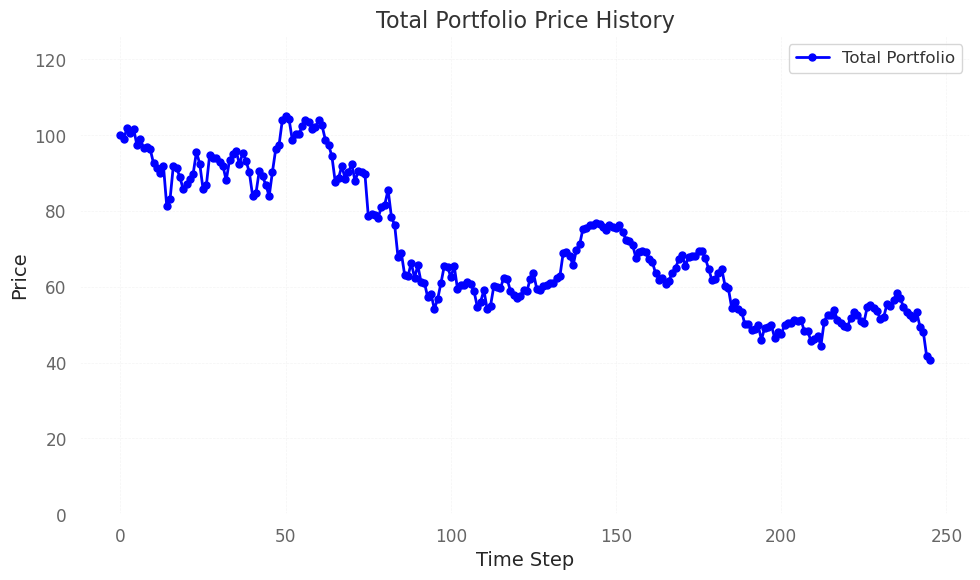

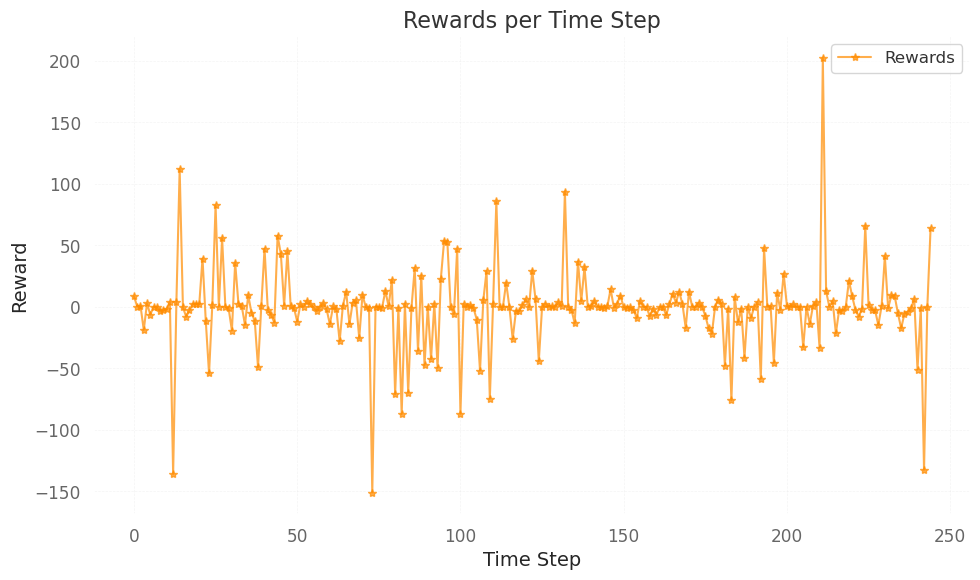

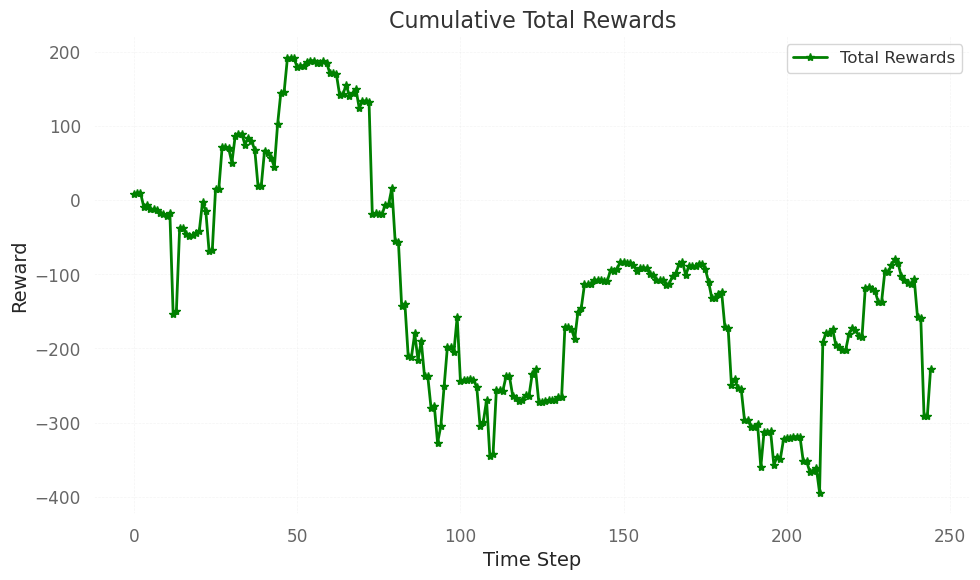

Total rewards: -227.9788864844718
Testing model: DQN
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_2
Evaluating model: DQN
DQN Train Mean reward: -11.11 ± 0.00
DQN Test Mean reward: -125.47 ± 0.00

DQN
Total return of portfolio: -37.51%


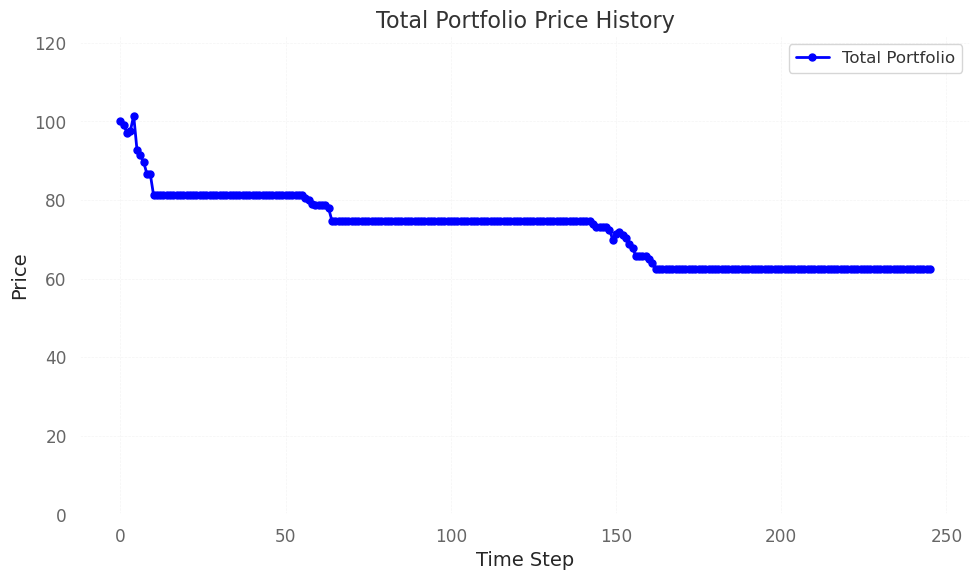

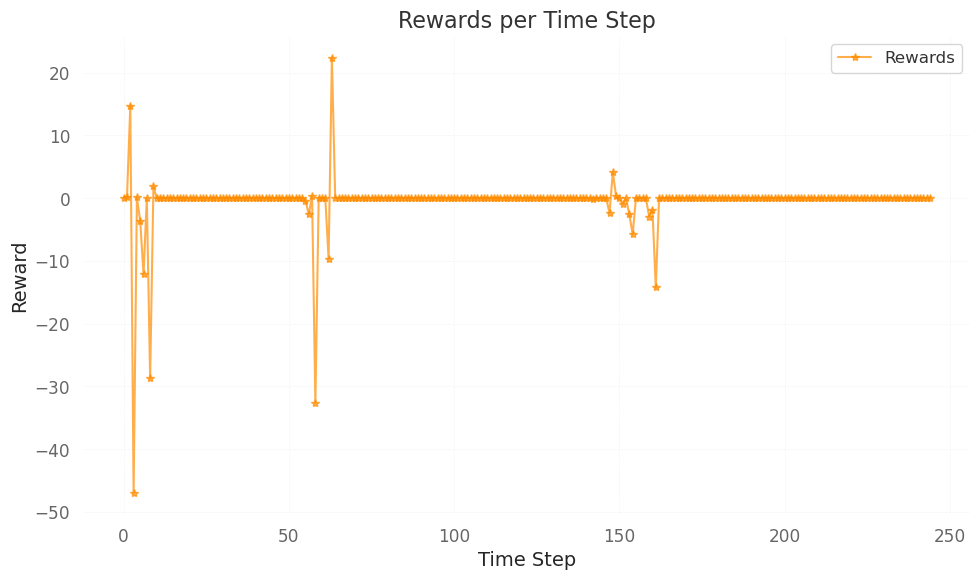

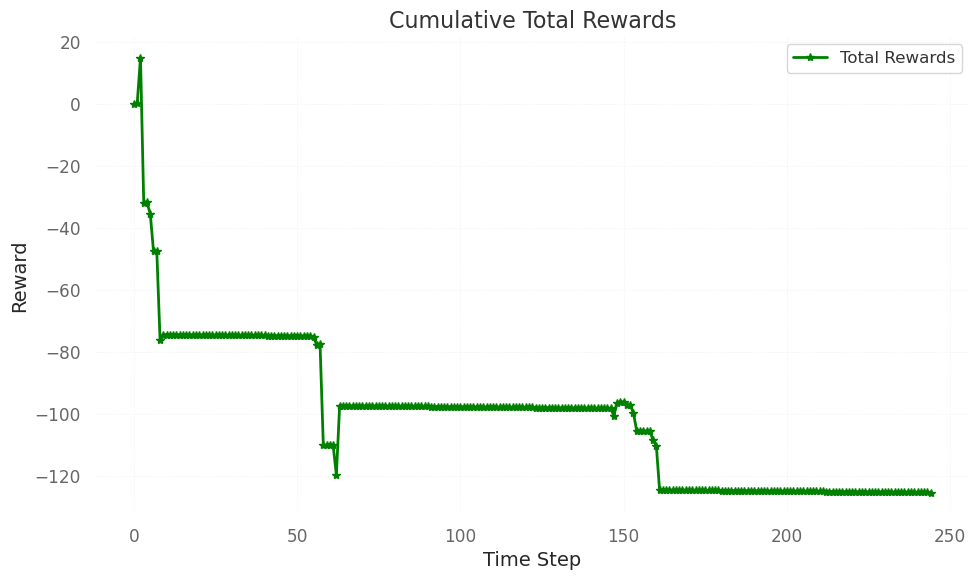

Total rewards: -125.47242411793717
Testing model: DDPG
Using cpu device
Model DDPG did not work because of The algorithm only supports (<class 'gymnasium.spaces.box.Box'>,) as action spaces but Discrete(7) was provided. Skipping to the next model...

Testing model: SAC
Using cpu device
Model SAC did not work because of The algorithm only supports (<class 'gymnasium.spaces.box.Box'>,) as action spaces but Discrete(7) was provided. Skipping to the next model...

Testing model: TD3
Using cpu device
Model TD3 did not work because of The algorithm only supports (<class 'gymnasium.spaces.box.Box'>,) as action spaces but Discrete(7) was provided. Skipping to the next model...

Testing model: TRPO
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_3
Evaluating model: TRPO
TRPO Train Mean reward: 1641.93 ± 0.00
TRPO Test Mean reward: 271.13 ± 0.00

TRPO
Total return of portfolio: -73.75%


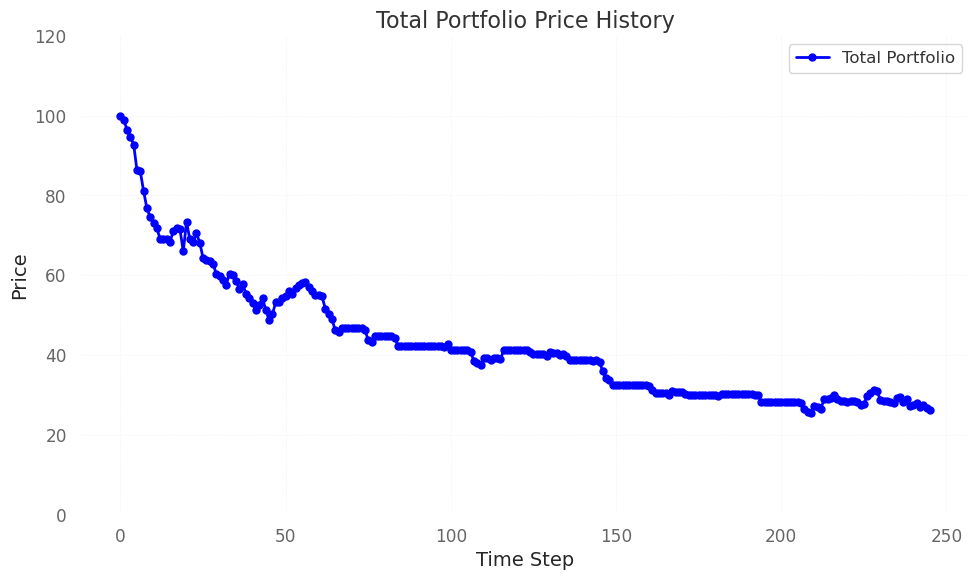

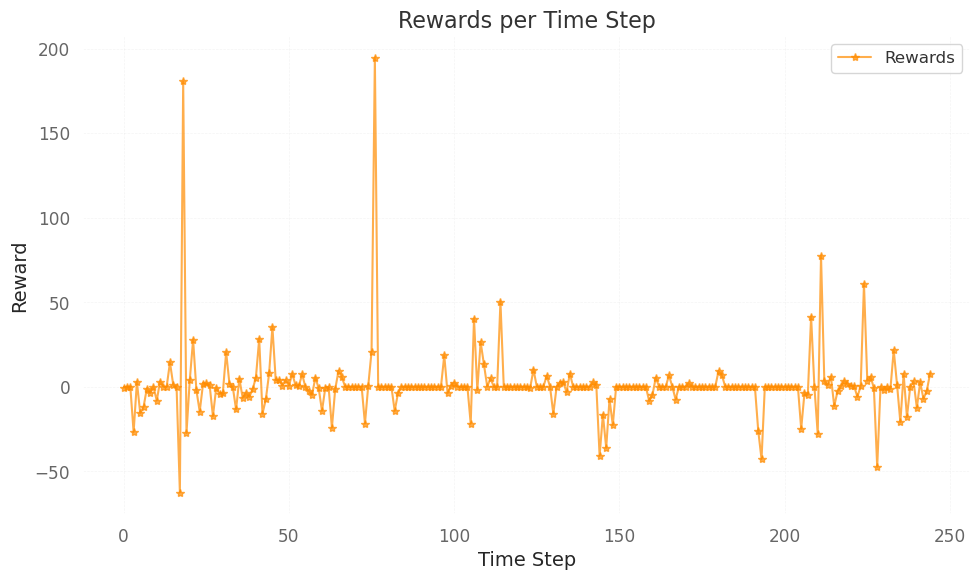

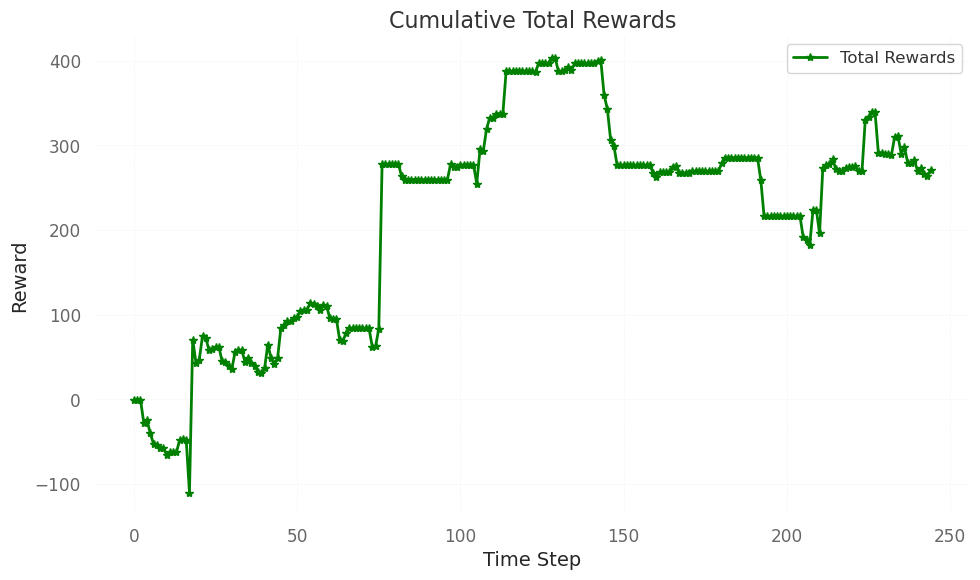

Total rewards: 271.1275753518794
Testing model: QRDQN
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_4
Evaluating model: QRDQN
QRDQN Train Mean reward: -11.25 ± 0.00
QRDQN Test Mean reward: -37.55 ± 0.00

QRDQN
Total return of portfolio: -47.60%


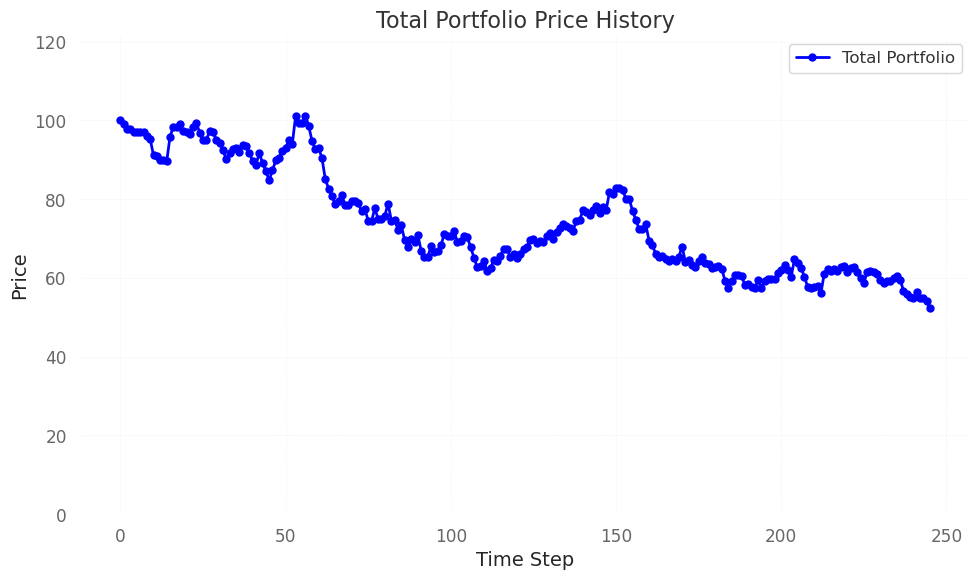

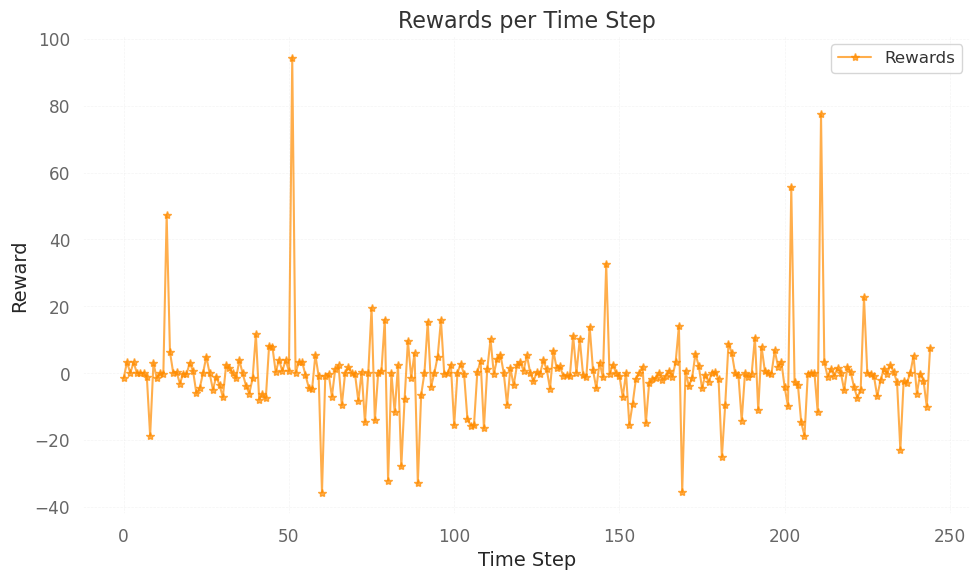

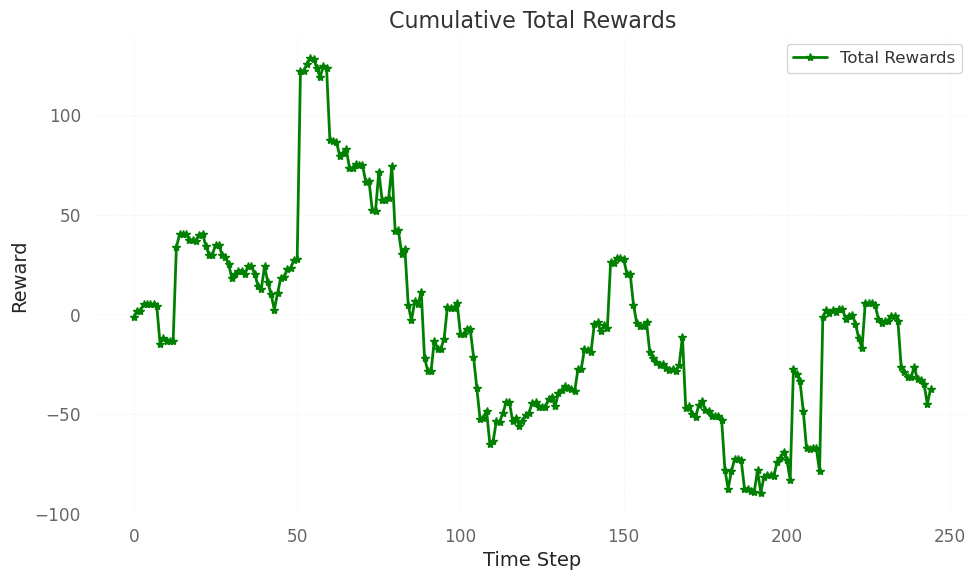

Total rewards: -37.54552009746989
Testing model: ARS
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_5
Evaluating model: ARS
ARS Train Mean reward: 212.76 ± 0.00
ARS Test Mean reward: -1517.24 ± 0.00

ARS
Total return of portfolio: -83.94%


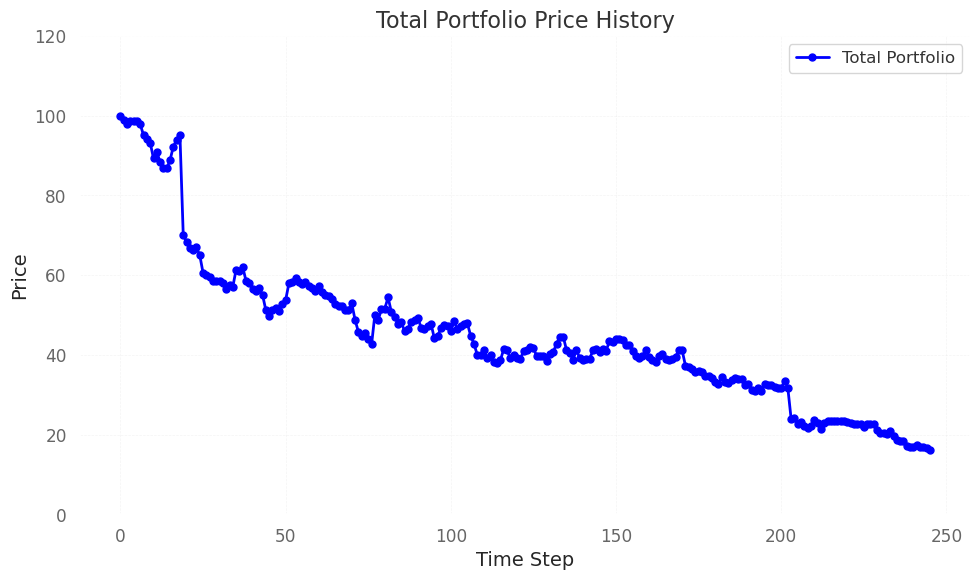

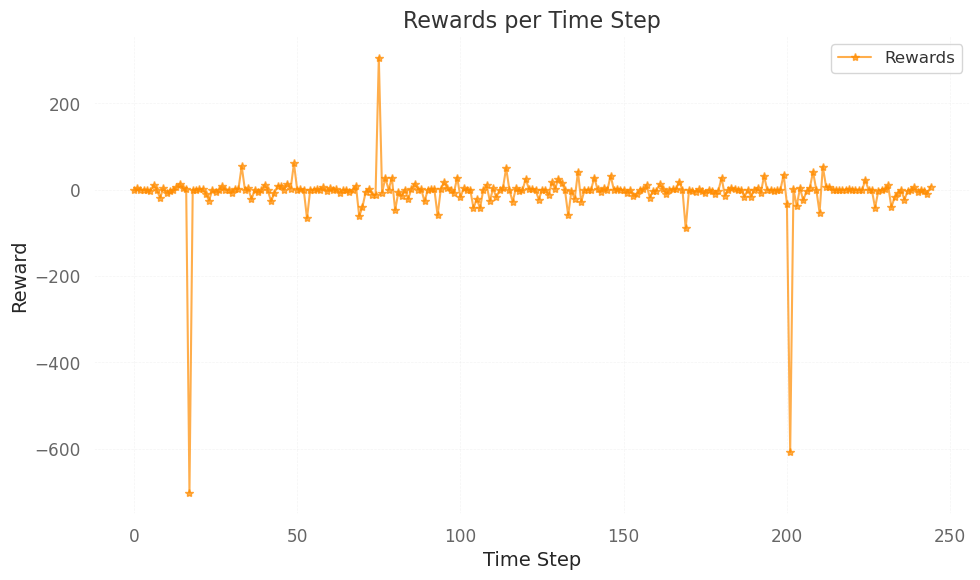

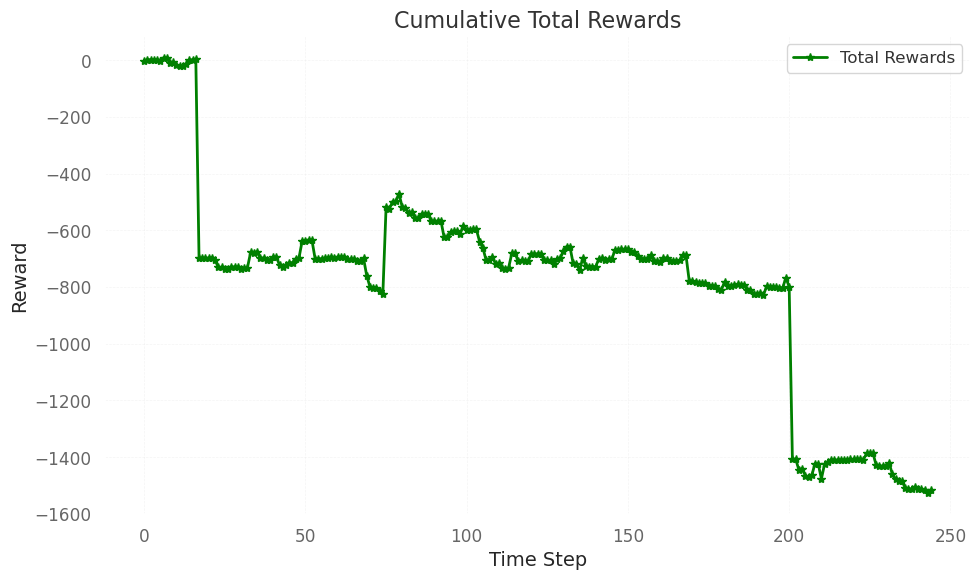

Total rewards: -1517.238743124617
Testing model: HER
Model HER did not work because of Unsupported model name: HER. Skipping to the next model...

Testing model: BC
BC rewards before training: 503.06 ± 0.00
--------------------------------
| batch_size        | 16       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00195 |
|    entropy        | 1.95     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 129      |
|    loss           | 1.94     |
|    neglogp        | 1.94     |
|    prob_true_act  | 0.143    |
|    samples_so_far | 16       |
--------------------------------
--------------------------------
| batch_size        | 16       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00169 |
|    entropy        | 1.69     |
|    epoch          | 7        |
|    l2_loss        | 0        |
|    l2_norm        | 130      |
|    loss           | 1.76     |
|

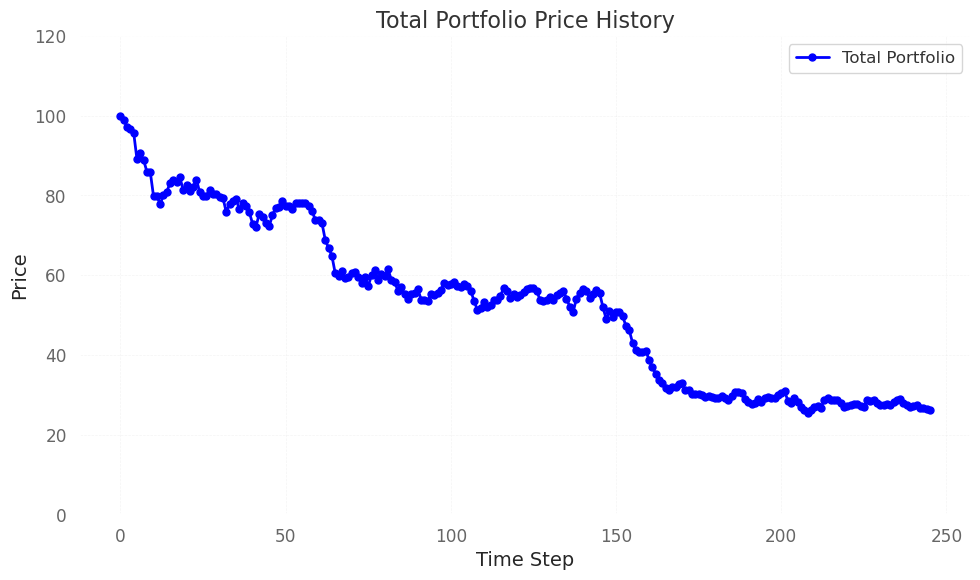

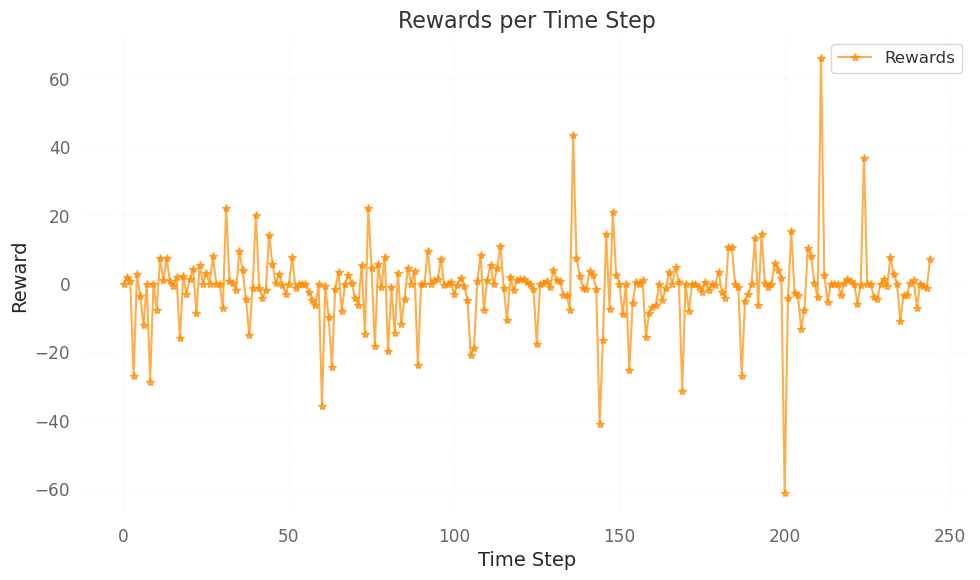

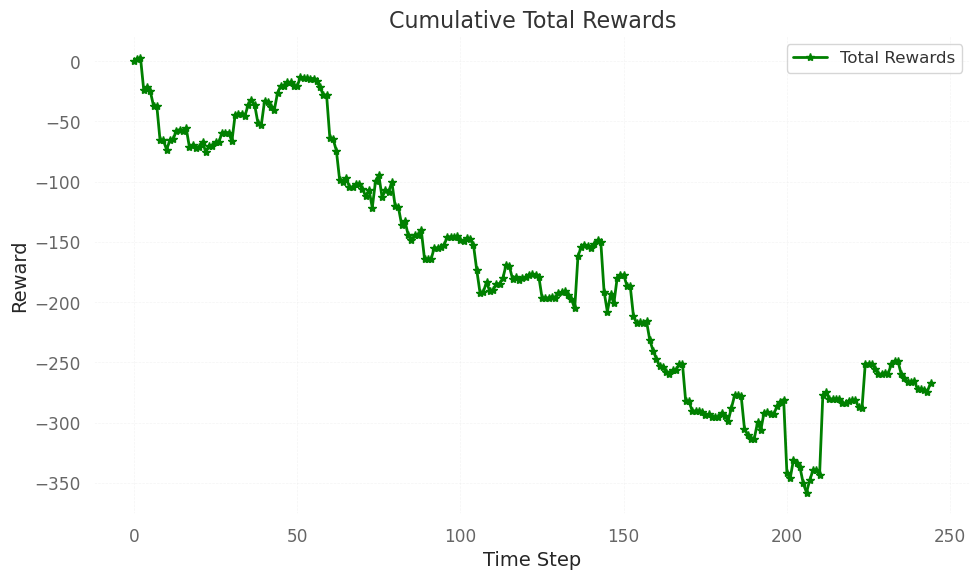

Total rewards: -267.11884799595407
Testing model: SQIL


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 9.62GB > 9.43GB
  warnings.warn(


Model SQIL did not work because of SubprocVecEnv.reset() takes 1 positional argument but 2 were given. Skipping to the next model...

Testing model: GAIL
Using cpu device
Model GAIL did not work because of GAIL.__init__() missing 1 required keyword-only argument: 'demo_batch_size'. Skipping to the next model...

Testing model: AIRL
Using cpu device
Model AIRL did not work because of AIRL.__init__() missing 1 required keyword-only argument: 'demo_batch_size'. Skipping to the next model...



In [7]:
import datetime
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement

# Define constants
SEED = 1
history_length = 5
reward_type = 'SQS'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
n_envs = 10
n_steps = 8
total_timesteps = 50_000
batch_size = 16
learning_rate = 0.02
ent_coef = 0.10
log_interval = 1_000
eval_freq = 1_000

current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_dir = f'./models/model_{current_date}'
log_dir = f'./logs/log_{current_date}'

# Training environment
env, vec_env = create_training_env(history_length, reward_type, '2017-01-01', '2021-06-30', stocks, n_envs)

# Validation environment
valid_env, vec_valid_env = create_evaluation_env(history_length, reward_type, '2021-07-01', '2021-12-30', stocks)

# Test environment
test_env, _ = create_evaluation_env(history_length, reward_type, '2022-01-01', '2022-12-30', stocks, n_envs=1)

# Evaluation callback for saving the best model
eval_callback = EvalCallback(
    vec_valid_env,
    n_eval_episodes=1,
    eval_freq=eval_freq,
    deterministic=True,
    verbose=1,
    best_model_save_path=model_save_dir,
)
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)

# Models to test
models_to_test = [
    #"PPO", 
    "A2C", 
    "DQN",
    "DDPG",
    "SAC",
    "TD3",
    "TRPO",
    "QRDQN",
    #"MaskablePPO",
    #"RecurrentPPO",
    "ARS",
    "HER",
    "BC",
    "SQIL",
    "GAIL",
    "AIRL"
]

# Train and evaluate all models
for model_name in models_to_test:
    try:
        print(f"Testing model: {model_name}")
        
        # HER requires a single env
        if model_name == "HER":
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                env=env,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED
            )
        # BC, SQIL, GAIL, and AIRL require transitions
        elif model_name in ["BC", "SQIL", "GAIL", "AIRL"]:
            transitions, expert_actions = collect_expert_data(env, seed=SEED)
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                vec_env=vec_env if model_name != "BC" else None,
                env=env if model_name == "BC" else None,
                transitions=transitions,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED
            )
        # RL models (e.g., PPO, A2C, etc.) use vec_env
        else:
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                vec_env=vec_env,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED
            )
        
        # Evaluate the model on training and test environments
        print(f"Evaluating model: {model_name}")
        
        # Training evaluation
        mean_train_reward, std_train_reward = evaluate_policy(
            trained_model.policy if hasattr(trained_model, 'policy') else trained_model,
            vec_env,
            n_eval_episodes=10,
            deterministic=True
        )
        print(f"{model_name} Train Mean reward: {mean_train_reward:.2f} ± {std_train_reward:.2f}")
        
        # Test evaluation
        mean_test_reward, std_test_reward = evaluate_policy(
            trained_model.policy if hasattr(trained_model, 'policy') else trained_model,
            test_env,
            n_eval_episodes=10,
            deterministic=True
        )
        print(f"{model_name} Test Mean reward: {mean_test_reward:.2f} ± {std_test_reward:.2f}\n")
        evaluate_model(test_env, trained_model, model_name, 1, has_policy=True) if hasattr(trained_model, 'policy') else evaluate_model(test_env, trained_model, model_name, 1, has_policy=False)
    except Exception as error:
        print(f"Model {model_name} did not work because of {error}. Skipping to the next model...\n")


In [ ]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

# Wrapping environments with `Monitor`
env, vec_env = create_training_env(history_length, reward_type, '2020-01-01', '2023-06-30', stocks, n_envs)
vec_env = DummyVecEnv([lambda: Monitor(env)])
valid_env, vec_valid_env = create_evaluation_env(history_length, reward_type, '2023-07-01', '2023-12-30', stocks)
vec_valid_env = DummyVecEnv([lambda: Monitor(valid_env)])
test_env, _ = create_evaluation_env(history_length, reward_type, '2024-01-01', '2024-10-30', stocks, n_envs=1)
test_env = Monitor(test_env)

# List of models to test
models_to_test = [
    "PPO", "A2C", "DQN", "DDPG", "SAC", "TD3",
    "TRPO", "QRDQN", "MaskablePPO", "RecurrentPPO", "ARS",
    "HER", "BC", "SQIL", "GAIL", "AIRL"
]

# Train and evaluate all models
for model_name in models_to_test:
    try:
        print(f"Testing model: {model_name}")
        
        # Skip models incompatible with discrete action spaces
        if model_name in ["DDPG", "SAC", "TD3"] and isinstance(env.action_space, gym.spaces.Discrete):
            print(f"Model {model_name} skipped due to incompatible action space.\n")
            continue

        # HER requires single env
        if model_name == "HER":
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                env=env,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED
            )
        # BC, SQIL, GAIL, and AIRL require transitions
        elif model_name in ["BC", "SQIL", "GAIL", "AIRL"]:
            transitions, expert_actions = collect_expert_data(env, seed=SEED)
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                vec_env=vec_env if model_name != "BC" else None,
                env=env if model_name == "BC" else None,
                transitions=transitions,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED,
                demo_batch_size=32,  # Fix for GAIL and AIRL
            )
        # RL models (e.g., PPO, A2C, etc.)
        else:
            trained_model = train_model(
                model_name=model_name,
                create_model=True,
                vec_env=vec_env,
                train_timesteps=total_timesteps,
                log_frec=log_interval,
                log_base_dir=log_dir,
                n_steps=n_steps,
                batch_size=batch_size,
                learning_rate=learning_rate,
                ent_coef=ent_coef,
                seed=SEED
            )
        
        # Evaluate the model
        print(f"Evaluating model: {model_name}")
        mean_train_reward, std_train_reward = evaluate_policy(trained_model.policy, vec_env, n_eval_episodes=10)
        mean_test_reward, std_test_reward = evaluate_policy(trained_model.policy, test_env, n_eval_episodes=10)
        print(f"{model_name} Train Reward: {mean_train_reward:.2f} ± {std_train_reward:.2f}")
        print(f"{model_name} Test Reward: {mean_test_reward:.2f} ± {std_test_reward:.2f}\n")

    except Exception as error:
        print(f"Model {model_name} did not work because of {error}. Skipping to the next model...\n")


Testing model: PPO
Using cpu device
Logging to ./logs/log_2024-11-27_18-06-59/RL_0_run_6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 16, but because the `RolloutBuffer` is of size `n_steps * n_envs = 8`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 8
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=8 and n_envs=1)
  warnings.warn(


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 874       |
|    ep_rew_mean          | 1.44e+03  |
| time/                   |           |
|    fps                  | 107       |
|    iterations           | 1000      |
|    time_elapsed         | 74        |
|    total_timesteps      | 8000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.79e-21 |
|    explained_variance   | 0         |
|    learning_rate        | 0.02      |
|    loss                 | 1.66e+04  |
|    n_updates            | 9990      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 3.36e+04  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 874       |
|    ep_rew_mean          | 1.57e+03  |


RL

In [ ]:
# Define constants
SEED = 1
history_length = 5
reward_type = 'SQS'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
n_envs = 10
n_steps = 8
total_timesteps = 10_000
batch_size = 16
learning_rate = 0.001
ent_coef = 0.10
log_interval = 1_000
eval_freq=1_000

current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_dir = f'./models/model_{current_date}'
log_dir = f'./logs/log_{current_date}'

# Training environment
env, vec_env = create_training_env(history_length, reward_type, '2020-01-01', '2023-06-30', stocks, n_envs)

# Validation environment
valid_env, vec_valid_env = create_evaluation_env(history_length, reward_type, '2023-07-01', '2023-12-30', stocks)

# Test environment
test_env, _ = create_evaluation_env(history_length, reward_type, '2024-01-01', '2024-10-30', stocks, n_envs=1)

# Evaluation callback for saving the best model
eval_callback = EvalCallback(
    vec_valid_env,
    n_eval_episodes=1,
    eval_freq=eval_freq,
    deterministic=True,
    verbose=1,
    best_model_save_path=model_save_dir,
)
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)

# Train the model
model = train_model(
    model_name="PPO",  # Can be 'PPO', 'A2C', or 'DQN'
    create_model=True,
    vec_env=vec_env,
    iterations=1,
    train_timesteps=total_timesteps,
    log_frec=log_interval,
    log_base_dir=log_dir,
    n_steps=n_steps,
    batch_size=batch_size,
    learning_rate=learning_rate,
    ent_coef=ent_coef
)

# Evaluate the model
evaluate_model(env, model, 'Train', SEED, has_policy=False)
evaluate_model(valid_env, model, 'Valid', SEED, has_policy=False)
evaluate_model(test_env, model, 'Test', SEED, has_policy=False)

# Save the model to the Tests folder
save_model(model, model_save_dir)

# Close environments
env.close()
valid_env.close()
test_env.close()
vec_env.close()
vec_valid_env.close()

BC

In [ ]:
# Define constants
SEED = 1
history_length = 5
reward_type = 'LNR'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
n_envs = 1
n_steps = 8
total_timesteps = 10_000
batch_size = 64
learning_rate = 0.001
ent_coef = 0.10
log_interval = 10_000
eval_freq=1_000
log_dir = './logs'
model_save_dir = './models'

# Training environment
env, vec_env = create_training_env(history_length, reward_type, '2020-01-01', '2023-06-30', stocks, n_envs)
valid_env, vec_valid_env = create_training_env(history_length, reward_type, '2023-07-01', '2023-08-30', stocks, 1)
transitions, expert_actions = collect_expert_data(env, seed=SEED)
bc_trainer = train_model(
    model_name="BC",
    create_model=True,
    env=env,
    transitions=transitions,
    bc_batches=2000,
    bc_log_interval=1_000,
    batch_size=118,
    seed=1
)
model_actions, returns, total_reward = evaluate_model(env, name="BC",has_policy=True,SEED=SEED,trainer=bc_trainer)
action_counts = pd.Series(model_actions).value_counts()
print("Action Counts:")
print(action_counts)
model_actions, returns, total_reward = evaluate_model(valid_env, name="BC",has_policy=True,SEED=SEED,trainer=bc_trainer)
action_counts = pd.Series(model_actions).value_counts()
print("Action Counts:")
print(action_counts)
best_actions, best_returns, total_reward = evaluate_best(env, expert_actions, SEED)
action_counts = pd.Series(best_actions).value_counts()
print("Action Counts:")
print(action_counts)

# Close environments
env.close()
valid_env.close()
vec_env.close()
vec_valid_env.close()